In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from math import log, exp

# Расчет дебитов

In [17]:
TaskTargetRate = {
    "base_prop": {
        "calc_id": "",
        "calc_type": "desuperposition",
        "segment_count": 20,
        "test_type": "kpd",
        "border_form": "rectangle",
        "border_type": "n",
        "border_type_z": "n"
    },
    "target": {
        "time_step": 0.01,
        "time_zero": 1,
        "number_of_steps": 100,
        "cummulative_work_time": 100,
        "work_type": {
            "is_periodic": False,
            "p_bhp": 150,
            "work_periods_time": []
        },
        "lift_prop": False
    },
    "unit": {
        "skin": 0,
        "h_eff": 10,
        "vertical_offset": 0.5,
        "perfres_ratio": 1,
        "ksk_ratio": 8.33,
        "skin_r": 0.455,
        "wellbore_prop": {
            "wellbore_type": "horizontal",
            "wellbore_r": 0.1,
            "afterinflow_model_name": "Stable",
            "afterinflow_coef": 0,
            "p_additional": "None",
            "redistribution_fase_time": "None",
            "horisontal_wellbore_length": 624,
            "horisontal_wellbore_perf_ratio": 1,
            "horisontal_perf_count": 5,
            "zenit_degree": 0,
            "permiability": 100000000
        },
        "layer_prop": {
            "permiability": 10,
            "kvkh_ratio": 0.1,
            "compressability": 0.00012,
            "porosity": 0.2,
            "p_res_init": 250,
            "viscosity_oil": 1,
            "b_oil": 1.2,
            "res_model_type": "Homogenius",
            "f_compressability": 0.0001,
            "f_porosity": 0.001,
            "lambda": 0.00001,
            "internal_r": "None",
            "kmu_in_out_ratio": 2,
            "kmuphict_in_out_ratio": 2,
            "reserves": {
                "prod_inj_ratio": 1,
                "oil_sutturatuion": 0.64,
                "k_displasment": 0.56,
                "fludding_k": 0.7,
                "wct_init": 0,
                "overfluding_k": 0.016,
                "b_arps": 0.9
            },
            "grp_prop": {
                "skin_h": 10,
                "kchk_ratio": 0.1,
                "kch_lengh": 5,
                "wchw_ratio": 0.5,
                "hf": 150,
                "kf": 50,
                "wellbore_wf": 4.31,
                "res_wf": 4.31,
                "grade": 1,
                "skin_border": 0,
                "skin_ch": 0,
                "fracture_grow_t": 0,
                "borders_prop": {
                    "x": 50,
                    "x1": 500,
                    "y": 500,
                    "dx": 100,
                    "wc_infinity_ratio": 0.5,
                    "circle_r": 150,
                    "cross_well_distance": 100,
                    "FcD": -1
                }
            },
            "layer_count": 1,
            "xe": 1000,
            "ye": 1000,
            "lc_ratio": 0.5,
            "wc_rectangle_ratio": 0.5
        }
    }
}

In [18]:
response_target_rate = requests.post(r"http://192.168.3.247:40000/calc_flow_rate", json=TaskTargetRate)
response_target_rate.text

'{"calc_id":"","result":{"flow_rate_result":[2290.3090428406686,2264.1776349928227,2238.4911168471813,2213.177518196915,2188.153303601159,2163.323956290155,2138.584900915601,2113.828657065524,2088.9462408785685,2063.8285908851376,2038.371471121972,2012.4847558896874,1986.0968152025866,1959.1359234661115,1931.5549837479737,1903.320673762063,1874.4106704645533,1844.8456497378736,1814.6021992792187,1783.7199723284755,1752.2119538547356,1720.0770934574525,1687.428759565618,1654.2805666187248,1620.5939307375822,1586.5434788385037,1552.117054428666,1517.3110593768486,1482.1984747440304,1446.9737296857231,1411.6249212764244,1376.0737053026564,1340.5924052404814,1305.1878232675956,1269.9808248028344,1234.8678716370355,1199.9710858742042,1165.7238636368982,1132.0126455820616,1098.5187293380295,1065.855330002213,1033.8918448143488,1002.5901608015171,972.0432919753473,942.3965987347201,913.6642223652478,885.4864823506994,858.1458766280781,831.8037624238826,806.6001224994009,781.5847988447138,757.

In [19]:
flow_rate = response_target_rate.json()["result"]["flow_rate_result"]
t = response_target_rate.json()["result"]["t"]

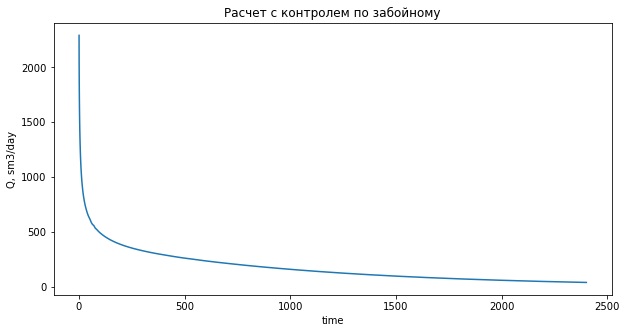

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(t, flow_rate)
plt.title("Расчет с контролем по забойному")
plt.xlabel("time") 
plt.ylabel("Q, sm3/day");

# Расчет давлений

In [21]:
TaskTargetPbhp = {
    "base_prop": {
        "calc_id": "",
        "calc_type": "desuperposition",
        "segment_count": 20,
        "test_type": "kpd",
        "border_form": "rectangle",
        "border_type": "n",
        "border_type_z": "n"
    },
    "target": {
        "time_step": 0.01,
        "number_of_steps": 100,
        "cummulative_work_time": 100,
        "test_time": 1000,
        "work_type": {
            "is_periodic": False,
            "q_liq": 50,
            "work_periods_time": []
        }
    },
    "unit": {
        "skin": 0,
        "h_eff": 10,
        "vertical_offset": 0.5,
        "perfres_ratio": 1,
        "ksk_ratio": 8.33,
        "skin_r": 0.455,
        "wellbore_prop": {
            "wellbore_type": "horizontal",
            "wellbore_r": 0.1,
            "afterinflow_model_name": "Stable",
            "afterinflow_coef": 0,
            "p_additional": "None",
            "redistribution_fase_time": "None",
            "horisontal_wellbore_length": 624,
            "horisontal_wellbore_perf_ratio": 1,
            "horisontal_perf_count": 5,
            "zenit_degree": 0,
            "permiability": 100000000
        },
        "layer_prop": {
            "permiability": 10,
            "kvkh_ratio": 0.1,
            "compressability": 0.00012,
            "porosity": 0.2,
            "p_res_init": 250,
            "viscosity_oil": 1,
            "b_oil": 1.2,
            "res_model_type": "Homogenius",
            "f_compressability": 0.0001,
            "f_porosity": 0.001,
            "lambda": 0.00001,
            "internal_r": "None",
            "kmu_in_out_ratio": 2,
            "kmuphict_in_out_ratio": 2,
            "reserves": {
                "prod_inj_ratio": 1,
                "oil_sutturatuion": 0.64,
                "k_displasment": 0.56,
                "fludding_k": 0.7,
                "wct_init": 0,
                "overfluding_k": 0.016,
                "b_arps": 0.9
            },
            "grp_prop": {
                "skin_h": 10,
                "kchk_ratio": 0.1,
                "kch_lengh": 5,
                "wchw_ratio": 0.5,
                "hf": 150,
                "kf": 50,
                "wellbore_wf": 4.31,
                "res_wf": 4.31,
                "grade": 1,
                "skin_border": 0,
                "skin_ch": 0,
                "fracture_grow_t": 0,
                "borders_prop": {
                    "x": 50,
                    "x1": 500,
                    "y": 500,
                    "dx": 100,
                    "wc_infinity_ratio": 0.5,
                    "circle_r": 150,
                    "cross_well_distance": 100,
                    "FcD": -1
                }
            },
            "layer_count": 1,
            "xe": 1000,
            "ye": 1000,
            "lc_ratio": 0.5,
            "wc_rectangle_ratio": 0.5
        }
    }
}

In [22]:
response_pbhp = requests.post(r"http://192.168.3.247:40000/calc_p_bhp", json=TaskTargetPbhp)
response_pbhp.text

'{"calc_id":"","result":{"p_wf_result":[248.75895028757444,248.73437450276938,248.709701191348,248.68493600073583,248.6600843348743,248.63515135603356,248.61014198698567,248.5850609149249,248.55991259564988,248.5347012588599,248.5094309139199,248.48410535641452,248.4587281769301,248.43330277084803,248.40783234343428,248.38231992288476,248.35676837322094,248.33118039332373,248.30555852204543,248.27990513252414,248.2542224167298,248.2285123678462,248.20277676393366,248.1770171650692,248.15123493912003,248.12543132488778,248.09960753294945,248.0737648668379,248.0479048227622,248.02202908941263,247.99613936142885,247.97023687491293,247.9443215743134,247.9183907850104,247.8924375521881,247.86644866058745,247.840402095253,247.81426491820073,247.78799164191898,247.7615222217535,247.73478053573083,247.70767599501974,247.68010513268894,247.65195137541332,247.62308598844842,247.59337588222706,247.56268992062448,247.5308916174501,247.49784342672874,247.46341655697137,247.42748415064912,247.389947

In [23]:
pbhp = response_pbhp.json()["result"]['p_wf_result']
t = response_pbhp.json()["result"]["t"]

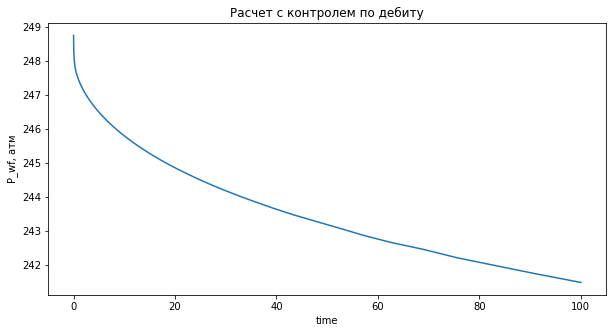

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(t, pbhp)
plt.title("Расчет с контролем по дебиту")
plt.xlabel("time") 
plt.ylabel("P_wf, атм");